# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
# LEARNING_RATE = [1e-1]
EPOCHS = 50
BATCH_SIZE = 256

In [11]:
results = {}
"""
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 188us/step - loss: 14.4450 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 204us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 199us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 14.5063 - acc: 0.1000 - val

50000/50000 [==============================] - 9s 187us/step - loss: 1.9292 - acc: 0.3019 - val_loss: 1.7635 - val_acc: 0.3648
Epoch 2/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.6995 - acc: 0.3907 - val_loss: 1.7146 - val_acc: 0.3806
Epoch 3/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6140 - acc: 0.4238 - val_loss: 1.5979 - val_acc: 0.4292
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.5536 - acc: 0.4472 - val_loss: 1.6183 - val_acc: 0.4280
Epoch 5/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.4990 - acc: 0.4665 - val_loss: 1.4906 - val_acc: 0.4729
Epoch 6/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.4653 - acc: 0.4773 - val_loss: 1.6597 - val_acc: 0.4072
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4317 - acc: 0.4909 - val_loss: 1.4539 - val_acc: 0.4768
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 165us/step - loss: 1.7073 - acc: 0.3998 - val_loss: 1.6656 - val_acc: 0.4169
Epoch 3/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6276 - acc: 0.4294 - val_loss: 1.5917 - val_acc: 0.4457
Epoch 4/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.5743 - acc: 0.4454 - val_loss: 1.5555 - val_acc: 0.4550
Epoch 5/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5311 - acc: 0.4584 - val_loss: 1.5322 - val_acc: 0.4526
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.4964 - acc: 0.4720 - val_loss: 1.5123 - val_acc: 0.4620
Epoch 7/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.4616 - acc: 0.4865 - val_loss: 1.4859 - val_acc: 0.4701
Epoch 8/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.4319 - acc: 0.4951 - val_loss: 1.4588 - val_acc: 0.4855
Epoch 9/50
50000/50000 [====================

50000/50000 [==============================] - 9s 172us/step - loss: 1.8569 - acc: 0.3513 - val_loss: 1.8314 - val_acc: 0.3570
Epoch 4/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.8070 - acc: 0.3694 - val_loss: 1.7881 - val_acc: 0.3753
Epoch 5/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7708 - acc: 0.3849 - val_loss: 1.7584 - val_acc: 0.3825
Epoch 6/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.7417 - acc: 0.3939 - val_loss: 1.7304 - val_acc: 0.3914
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.7172 - acc: 0.4039 - val_loss: 1.7098 - val_acc: 0.4005
Epoch 8/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6960 - acc: 0.4105 - val_loss: 1.6886 - val_acc: 0.4104
Epoch 9/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6769 - acc: 0.4162 - val_loss: 1.6735 - val_acc: 0.4127
Epoch 10/50
50000/50000 [==================

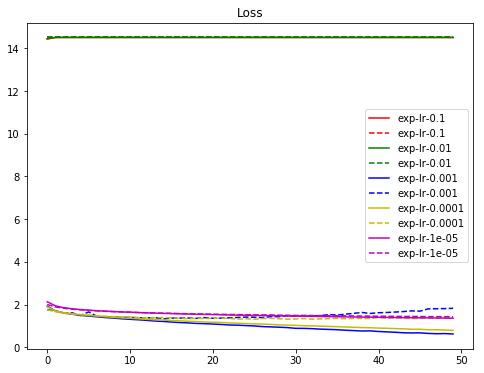

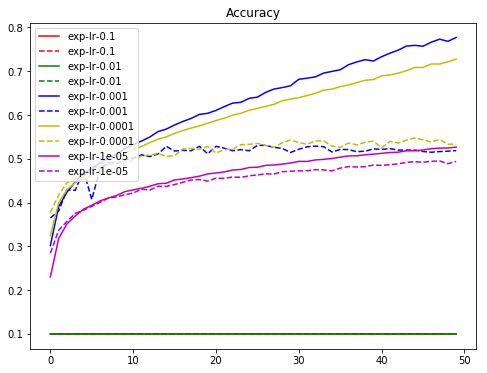

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()